## Maxwell A. Fine 1004714400

## Collaborators: Zed Hoffman Q1, Q2

# Cross-correlation (8 marks, 4/4)

It has been shown that noise records at two seismic stations, when cross-correlated and stacked,
are very closely associated with the Green's function between these two seismic stations (i.e. given
a delta force at one station, the displacement recorded at the other station). On Quercus,
two files are given: one is a vertical component seismogram at PHL (Park Hill) and the other is
a vertical component seismogram at MLAC (Mammoth Lakes). Both are records for one day (24
hours) on February 1, 2003. Sampling rate is $dt = 1.0$ seconds.

 1. Take the cross-correlation (using FFT) of these seismograms using the record at PHL as $x(t)$
    and that at MLAC as $y(t)$ and plot $C_{xy}(\tau)$. Zoom in your plot between [-300; 300] seconds.
 2. Bit conversion is often used for the cross-correlation Greens function approach. It simply
    changes any positive numbers to 1 and negative numbers to -1 (numpy `sign()` function).
    Apply this to the data at PHL and MLAC and compute their cross-correlation. Compare
    the results against those from the previous step. Does bit-conversion work in this case to
    preserve the phase information of the true cross-correlation? (Note the amplitude of
    bit-converted cross-correlation is of no meaning).

    _Hint_: for discrete cross-correlation using fft:
    - suppose `x = [x0 x1 ... x(N-1)]; y = [y0 y1 ... y(N-1)]`
    - note conv(x,y)=v=[v0 v1 ... v(2N-2)], and notice the relationship between convolution and cross-correlation
    - also note how the fourier transform of the cross-correlation is related to $X(w)^*Y(w)$
    - if we first pad the end of each x and y array with N-1 zeros, convolution theorem suggests that we can interpret the inverse transform of $X^*(w)Y(w)$ as the result of a convolution (length 2N-1), w, interpreted as:  
          w = ifft(...)
            = [w[lag = 0] w[lag = 1 dt] ... w[lag = (N-1) dt] w[lag = -(N-1) dt] ... w[lag = -1 dt]]
    - we then must apply fftshift to center the time shift/lag axis at 0
    - the point of this fft approach is that it's much faster than directly convolving; you can check against  np.correlate(x, y, mode='same')
    - "zoom your plot to [-300, 300]" is in reference to the time lag axis in the above process

    _Hint_: you can load the ascii file into Python by `genfromtxt` function:  
        tmp = np.genfromtxt('MLAC_data.txt')  
        mlac = tmp.flatten()

In [2]:
# imports 
import numpy as np
import matplotlib.pyplot as plt

# read in the data

time_NWAO, NWAO = np.loadtxt('nwao.vh1', unpack=True)
PHL = np.loadtxt('PHL_data.txt').flatten()
MLAC_data = np.genfromtxt('MLAC_data.txt').flatten()

## Recall:

The Cross-Correlation is defined as:

$$ C_{fg}(\tau) = \int_{-\infty}^{\infty} f^*(t)g(t-\tau)dt$$

Where f, and g are two arrays and $^*$ indicates taking the conjugate.

In FFT Space this is:
$$C(\omega) = F^*(\omega)G(\omega)$$

where $\omega$ is the angular frequecny 

So, for 1.1 all I have to do is take the FFT of both (with assocatied shifts) then multiply them together and then do the iFFT. then I Produce a few plots

/home/afinemax/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/afinemax/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Cross-Correlation of of the signs of MLAC & PHL Data')

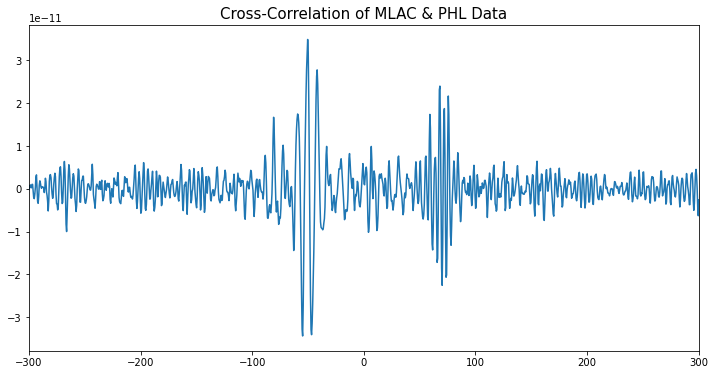

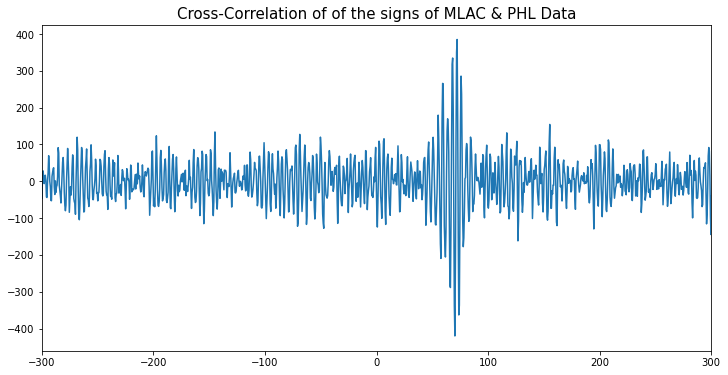

In [3]:
def cross_correlation(X, Y, dt):
    
    # pad arrays
    N = len(X)
    X = np.concatenate((X, np.zeros(N)))
    Y = np.concatenate((Y, np.zeros(N)))
    
    # ft
    X_fft = np.fft.fft(X) * dt
    Y_fft = np.fft.fft(Y) * dt
    
    # conjugate X and cross-correlate
    cross = np.conjugate(X_fft)*Y_fft
    
    #ifft and return
    ifft_cross = np.fft.fftshift(np.fft.ifft(cross)) / dt
    
    return ifft_cross


    
    
cross = cross_correlation(PHL, MLAC_data, dt=0.1)
cross_bit = cross_correlation(np.sign(PHL), np.sign(MLAC_data), dt=0.1)
time_axis = np.linspace(-24*60*60/2, 24*60*60/2, len(cross))
plt.figure(figsize=(12,6))
plt.plot(time_axis, cross, )#label='Cross-Correlation of MLAC & PHL Data')
plt.xlim(-300,300) 
plt.title('Cross-Correlation of MLAC & PHL Data', size=15)

# plot in the sign
cross_bit = cross_correlation(np.sign(PHL), np.sign(MLAC_data), dt=0.1)
time_axis = np.linspace(-24*60*60/2, 24*60*60/2, len(cross_bit))
plt.figure(figsize=(12,6))
plt.plot(time_axis, cross_bit, )#label='Cross-Correlation of MLAC & PHL Data')
plt.xlim(-300,300) 
plt.title('Cross-Correlation of of the signs of MLAC & PHL Data', size=15)





# Compare the results against those from the previous step. Does bit-conversion work in this case to preserve the phase information of the true cross-correlation? (Note the amplitude of bit-converted cross-correlation is of no meaning).

Answer:

No, There is missing feature from the true Cross-Correlation compared to the sign version! Clearly this is does not preserve the phase information. 

Conceptually this makes sense as the phase is dependent on the magnitude of the componets, which in the sign version is only binary. 

# Normal Modes from Long Period Seismometer (7 marks, 1/2/2/1/1)

Background: The solid earth 'rings' like a bell after being struck by a great earthquake. These
are the normal modes associated with internal structures (density and elastic moduli) of the Earth,
and the excitation amplitudes of these modes are determined by the earthquake source mechanism.
The frequencies of these normal modes of oscillation are very low, usually between 0.1 milliHertz
(mHz) and 10 mHz. It is hard to see them above 10 mHz because these higher frequency modes
attenuate quickly, or the frequency spacings are too small to be identified individually. Because
the Earth is a complex structure, with twisting, breathing, and more complex spatial structure in
its modes, the modal frequencies are not simple multiples of a single fundamental as is the case
for a guitar string. They are labelled with a notation (e.g. like $_0S_2$ for spheroidal modes or like
$_1T_8$ for toroidal modes) based on the spherical harmonic spatial distribution that the mode corresponds
to, in the same way that the electron wavefunctions for the Hydrogen atom are labelled. Geophysicists
measure these frequencies because they can be used to invert for models of the Earth's
internal seismic velocity and density structures. With very high-resolution data, one can even see
splitting of these resonances due to the Earth’s rotation and elliptical shape, in a matter analogous
to the Zeeman splitting of atomic spectral lines. You can also optically detect similar phenomenon
('helioseismology') going on in the sun, from which one can also test models of the sun's interior.
(More descriptions can be found on any introductory solid-earth geophysics book).
Here we examine three days of very long period seismic data recorded on the horizontal direction at
station NWAO (Narrogin, Western Australia) after the devastating $M_w = 9.0$, Mar 11th, 2011 Honshu,
Japan earthquake. Data `nwao.vh1` (VH channel, $dt = 10 \text{ sec}$) is given as an ascii
file with two columns: time and velocity (in counts from the digitizer).

 1. Plot the raw data with a time axis in hours.
 2. Plot the power spectrum of your raw data as a function of frequency (in mHz) **without**
    any windowing.
 3. Plot the power spectrum of your raw data after 
     - removing the minor linear trend in the same way as Lab 3, and subsequently 
     - applying a hanning window $w_n = 1 - \cos(2 \pi \frac{n}{N}) ; 0 \leq n \leq N$ (where N is the length of the data file)
 4. Plot on top of each other the power spectra from 2 and 3 between [0.1, 2.6] mHz, and comment on the difference.
 5. Using plt.annotate(...), identify any normal modes you can see. Use the provided modes.pdf (Table 1) to help guide your identification.

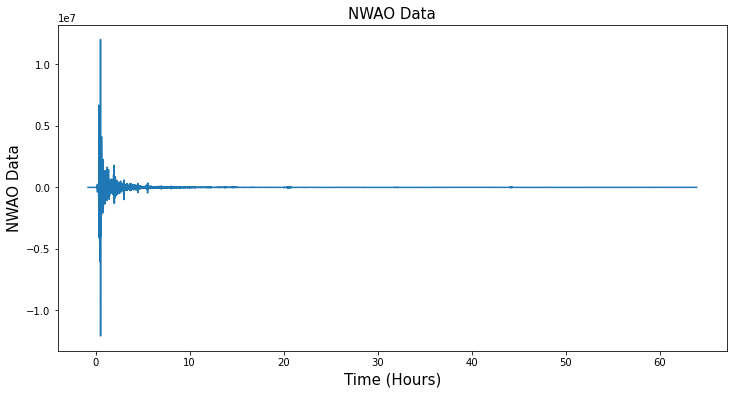

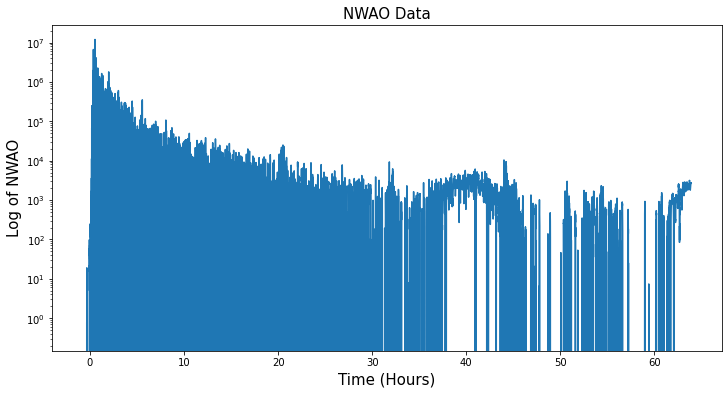

In [4]:

plt.figure(figsize=(12,6))
plt.plot(time_NWAO / 60 / 60, NWAO)
#plt.yscale('log')
plt.xlabel('Time (Hours)', size=15)
plt.ylabel('NWAO Data', size=15)
plt.title('NWAO Data', size=15)
plt.show()

dt = 10 
plt.figure(figsize=(12,6))
plt.plot(time_NWAO / 60 / 60, NWAO)
plt.yscale('log')
plt.xlabel('Time (Hours)', size=15)
plt.ylabel('Log of NWAO', size=15)
plt.title('NWAO Data', size=15)
plt.show()


Ya ya the top plot is good enough for the question, but we typically talk about the earthquake magnitude which is a log scale so the bottom plot might be more usefull. 

Text(0, 0.5, 'Amplitude')

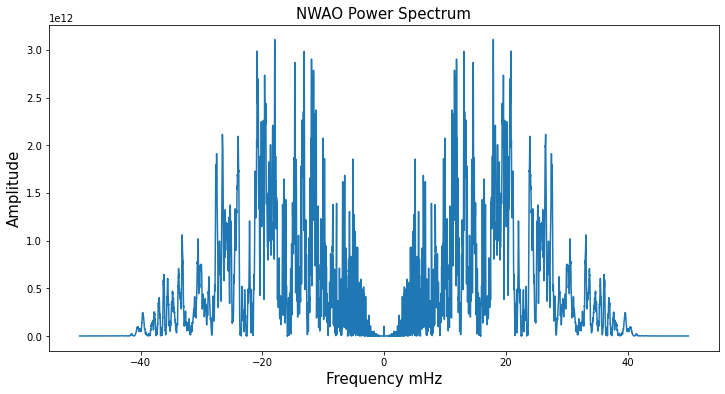

In [14]:
# power spectrum
dt = 10 
total_time = time_NWAO[-1] - time_NWAO[0]
NWAO_fft = np.fft.fftshift(np.fft.fft(NWAO) * dt)
NWAO_power = np.abs(NWAO_fft)**2 / total_time

freq = np.fft.fftshift( np.fft.fftfreq(len(NWAO_fft), dt) )
plt.figure(figsize=(12,6))
plt.plot(freq *1000, NWAO_power)
plt.title('NWAO Power Spectrum', size=15)
plt.xlabel('Frequency mHz', size=15)
plt.ylabel('Amplitude', size=15)


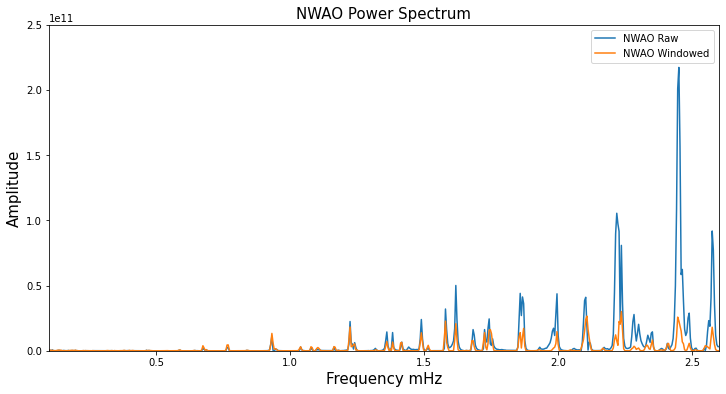

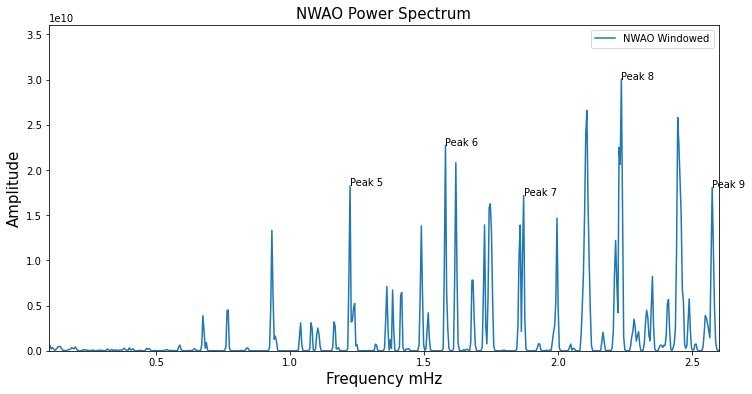

In [12]:
# window stuff
from scipy.optimize import curve_fit
from scipy.signal import find_peaks # for peak fiding 
n = np.arange(len(NWAO_fft))
window = 1 - np.cos(2*np.pi * n / len(NWAO_fft)) #(1−cos(2𝜋𝑛𝑁);0≤𝑛≤𝑁
#plt.plot(window)
#plt.show()

# plt.plot(time_NWAO / 60 / 60, NWAO)

# we want to fit a line to this 

def line_func(x, a, b):
    # Define a linear function y = a*x + b
    return a * x + b

def fit_line(x, y):
    # Use curve_fit to fit the line function to the data
    popt, pcov = curve_fit(line_func, x, y)
    
    # Extract the slope and intercept from the optimal parameters
    slope = popt[0]
    intercept = popt[1]
    
    return slope, intercept

slope, intercept = fit_line(time_NWAO, NWAO) #/ 60 / 60, NWAO) # in hours!

detrend_NWAO = NWAO - NWAO*slope + intercept

detrend_window = detrend_NWAO*window

# power spectrum
dt = 10 
total_time = time_NWAO[-1] - time_NWAO[0]
detrend_window_NWAO_fft = np.fft.fftshift(np.fft.fft(detrend_window) * dt)
detrend_window_NWAO_power = np.abs(detrend_window_NWAO_fft)**2 / total_time

freq = np.fft.fftshift( np.fft.fftfreq(len(NWAO_fft), dt) )
plt.figure(figsize=(12,6))
plt.plot(freq *1000, NWAO_power, label='NWAO Raw')
plt.plot(freq *1000, detrend_window_NWAO_power, label='NWAO Windowed')
plt.legend()
plt.title('NWAO Power Spectrum', size=15)
plt.xlabel('Frequency mHz', size=15)
plt.ylabel('Amplitude', size=15)
plt.xlim(0.1, 2.6)
plt.ylim(0, 0.25e12)

from scipy.signal import find_peaks

mask = (0.1 < (freq * 1000)) & ((freq * 1000) < 2.6)  # Create a boolean mask
x = (freq * 1000)[mask]  # Apply the mask to select values of x
y = detrend_window_NWAO_power[mask]  # Apply the mask to select values of y

peaks, _ = find_peaks(y, distance=50)
top_five = np.argsort(y[peaks])[-5:][::-1]  # Get indices of the top 5 peaks
plt.figure(figsize=(12,6))
plt.plot(freq *1000, detrend_window_NWAO_power, label='NWAO Windowed')
plt.title('NWAO Power Spectrum', size=15)
plt.xlabel('Frequency mHz', size=15)
plt.ylabel('Amplitude', size=15)
plt.legend()
plt.xlim(0.1, 2.6)
plt.ylim(0, 1.2*np.max(y))


for i in top_five:
    plt.annotate(f"Peak {i+1}", xy=(x[peaks[i]], y[peaks[i]]), xytext=(x[peaks[i]], y[peaks[i]])),
                 #arrowprops=dict(facecolor='black', shrink=0.05))


The Windowed Power spectrum has smaller (by an order of magnitude) power spectrum peaks compared to the raw data. The effect is more noticable for higher frequencies which is reasonable as the higher frequencies would be more impacted by the effect of the hanning window. The main impact of the window is the Y axis scalling over all as well. (there are some missing frequenies which is probably from the detrending).


